---
v2/ 评审老师好：
非常感谢详细的评审建议，已经全部修改完成。
还有个更新的问题放在报告中：**updated v2 require 1**位置，请老师指点。

再次感谢，老孟。

- 反馈：增加了热力图

---
v1/ 评审老师好：
请教3个问题请教：
question1 和 question2 在报告中加黑描述了。
question3: 本项目最后因为轮廓系数的原因呢选择了两个分类。请问下，在实际使用中有没有因为要保留更多的方差，所以不选择轮廓系数最优分类的现象？（比如本项目中，选择n=3而不是2？）
> 反馈：很有可能，轮廓系数是一种常用的帮助我们评价聚类效果好坏的方式，但并不意味着得出的结果一定在每一个场景中都是最优的。在实际情况下，可能不同的尝试会带来更好的效果。

非常感谢，老孟。

# 机器学习纳米学位
## 非监督学习
## 项目 3: 创建用户分类

欢迎来到机器学习工程师纳米学位的第三个项目！在这个 notebook 文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以 **'TODO'** 标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown 可以通过双击进入编辑模式。

## 开始

在这个项目中，你将分析一个数据集的内在结构，这个数据集包含很多客户真对不同类型产品的年度采购额（用**金额**表示）。这个项目的任务之一是如何最好地描述一个批发商不同种类顾客之间的差异。这样做将能够使得批发商能够更好的组织他们的物流服务以满足每个客户的需求。

这个项目的数据集能够在[UCI机器学习信息库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到.因为这个项目的目的，分析将不会包括 'Channel' 和 'Region' 这两个特征——重点集中在6个记录的客户购买的产品类别上。

运行下面的的代码单元以载入整个客户数据集和一些这个项目需要的 Python 库。如果你的数据集载入成功，你将看到后面输出数据集的大小。

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3.x 来完成此项目')

In [2]:
# 引入这个项目需要的库
import numpy as np
import pandas as pd
import visuals as vs
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline
# 高分辨率显示
# %config InlineBackend.figure_format='retina'

# 载入整个客户数据集
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## 分析数据
在这部分，你将开始分析数据，通过可视化和代码来理解每一个特征和其他特征的联系。你会看到关于数据集的统计描述，考虑每一个属性的相关性，然后从数据集中选择若干个样本数据点，你将在整个项目中一直跟踪研究这几个数据点。

运行下面的代码单元给出数据集的一个统计描述。注意这个数据集包含了6个重要的产品类型：**'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**和 **'Delicatessen'**。想一下这里每一个类型代表你会购买什么样的产品。

In [3]:
# 显示数据集的一个描述
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 练习: 选择样本
为了对客户有一个更好的了解，并且了解代表他们的数据将会在这个分析过程中如何变换。最好是选择几个样本数据点，并且更为详细地分析它们。在下面的代码单元中，选择**三个**索引加入到索引列表`indices`中，这三个索引代表你要追踪的客户。我们建议你不断尝试，直到找到三个明显不同的客户。

Fresh               112151
Milk                 73498
Grocery              92780
Frozen               60869
Detergents_Paper     40827
Delicatessen         47943
dtype: int64

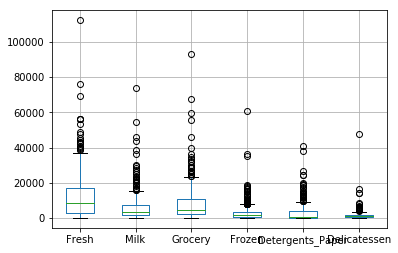

In [4]:
# check1 - boxplot and max
data.boxplot();
data.max()

In [5]:
# check2 drop 使用sklearn转换不能直接看出什么
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nscaler.fit(data)\nscaler.transform(data)\n'

In [6]:
# check2 compare with mean
ratio2mean =data / data.mean()
ratio2mean.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.055724,1.665900,0.950916,0.069663,0.927991,0.877452
1,0.588069,1.692469,1.203329,0.573580,1.142810,1.164689
2,0.529404,1.519599,0.966386,0.782895,1.220201,5.144044
3,1.105389,0.206340,0.530858,2.084682,0.175950,1.172559
4,1.884537,0.933360,0.905263,1.274442,0.616694,3.400289


根据问题一的种类提醒的推测：
- 超市 比较平均
    - 使用所有加和找No.1
- 咖啡馆 Milk，Detergents比例比较高
    - 使用 Milk和Detergents与其他比例加和找No.1
- 零售商 应该在某一方面比例很高
    - 使用 每列和其他列的比值加和找No.1
- 其他

> 反馈：
我们建议选择 percentile 而非 mean，因为在未知数据分布的情况下使用均值作为比较对象是比较危险的——因为不清楚概率分布，所以用 percentile、median 这样的统计特征会相对好一点。更多你可以参考[描述统计学](https://zh.wikipedia.org/wiki/%E6%8F%8F%E8%BF%B0%E7%BB%9F%E8%AE%A1%E5%AD%A6)、或者[数据的统计量特征](http://blog.csdn.net/trierwang/article/details/4855309)。

In [7]:
columns = data.columns
columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [8]:
# check3 decisiton tbc
## supermarket
supercheck = ratio2mean.Fresh + ratio2mean.Milk + ratio2mean.Grocery 
+ ratio2mean.Frozen +   ratio2mean.Detergents_Paper +  ratio2mean.Delicatessen

supercheck.idxmax()

85

In [9]:
supercheck.max()

20.98174679396973

In [10]:
data.iloc[85,:]

Fresh               16117
Milk                46197
Grocery             92780
Frozen               1026
Detergents_Paper    40827
Delicatessen         2944
Name: 85, dtype: int64

In [11]:
## coffee
coffee_key = ['Milk','Detergents_Paper']
coffeecheck = ratio2mean['Milk'] + ratio2mean['Detergents_Paper']
## 以 Milk 和 Detergents_Paper 为基准
#coffeecheck = data[]
for i in coffee_key:
    for j in columns:
        if j != i:
            coffeecheck = coffeecheck + data[i] / data[j]

coffeecheck.idxmax()

109

In [12]:
coffeecheck.max()

5917.435458550448

In [13]:
data.iloc[109,:]

Fresh                1406
Milk                16729
Grocery             28986
Frozen                673
Detergents_Paper      836
Delicatessen            3
Name: 109, dtype: int64

In [14]:
## grocery
diff = ratio2mean['Fresh']/ratio2mean['Milk']
for i in columns:
    for j in columns:
        diff = diff + ratio2mean[i]/ratio2mean[j]
diff.idxmax()
## 后续优化

338

In [15]:
diff.max()

26905.19202152727

In [16]:
data.iloc[338,:]

Fresh                   3
Milk                  333
Grocery              7021
Frozen              15601
Detergents_Paper       15
Delicatessen          550
Name: 338, dtype: int64

In [17]:
# TODO：从数据集中选择三个你希望抽样的数据点的索引
indices = [85,109,338]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,1406,16729,28986,673,836,3
2,3,333,7021,15601,15,550


### 问题 1
在你看来你选择的这三个样本点分别代表什么类型的企业（客户）？对每一个你选择的样本客户，通过它在每一种产品类型上的花费与数据集的统计描述进行比较，给出你做上述判断的理由。


**提示：** 企业的类型包括超市、咖啡馆、零售商以及其他。注意不要使用具体企业的名字，比如说在描述一个餐饮业客户时，你不能使用麦当劳。

**回答:**
根据上面得出3个示例的过程，为3:
- supermarket
- coffee shop
- grocery

### 练习: 特征相关性
一个有趣的想法是，考虑这六个类别中的一个（或者多个）产品类别，是否对于理解客户的购买行为具有实际的相关性。也就是说，当用户购买了一定数量的某一类产品，我们是否能够确定他们必然会成比例地购买另一种类的产品。有一个简单的方法可以检测相关性：我们用移除了某一个特征之后的数据集来构建一个监督学习（回归）模型，然后用这个模型去预测那个被移除的特征，再对这个预测结果进行评分，看看预测结果如何。

在下面的代码单元中，你需要实现以下的功能：
 - 使用 `DataFrame.drop` 函数移除数据集中你选择的不需要的特征，并将移除后的结果赋值给 `new_data` 。
 - 使用 `sklearn.model_selection.train_test_split` 将数据集分割成训练集和测试集。
   - 使用移除的特征作为你的目标标签。设置 `test_size` 为 `0.25` 并设置一个 `random_state` 。
 
 
 - 导入一个 DecisionTreeRegressor （决策树回归器），设置一个 `random_state`，然后用训练集训练它。
 - 使用回归器的 `score` 函数输出模型在测试集上的预测得分。

In [18]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [19]:
# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一个特征# TODO： 
new_data = data.drop(['Grocery'] , axis = 1)
new_data.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,214,2674,1338
1,7057,9810,1762,3293,1776
2,6353,8808,2405,3516,7844
3,13265,1196,6404,507,1788
4,22615,5410,3915,1777,5185


In [20]:
new_data_y = data['Grocery']
new_data_y[:3]

0    7561
1    9568
2    7684
Name: Grocery, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

# TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_y, test_size = 0.2, random_state = 0)
## stratify是为了保持split前类的分布。比如有100个数据，80个属于A类，20个属于B类。
## 即保证stratify指定内容分类的平衡（在不知道样本分布特性时使用）
## 这里使用会报错y的维度（因为只有1维，至少要2维，否则不需要）

**updated v2 require 1**

---
- random_state 已经添加
- `这里我想问的是（见下面两个代码框）：`
    - score_train 的得分为1 （根据老师反馈：这里用其他features预测Grocery得到了正值的R^2，所以表示Grocery在一定程度上是可以通过其他特征的组合来替代的，所以对于区分用户消费习惯来说可能不太重要。）这点已经明白了。
    - 但是为什么 score_test 却得到了负数呢？会不会是产生额过拟合呢？
    - 而且提示说的是 `一个负的  𝑅2 表示模型不能够拟合数据。` 这里要怎么理解？

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

# TODO：创建一个DecisionTreeRegressor（决策树回归器）并在训练集上训练它
regressor = DecisionTreeClassifier(random_state=0)
regressor.fit(X_train, y_train)

# TODO：输出在测试集上的预测得分
predict_train = regressor.predict(X_train)
score_train = r2_score(y_train, predict_train)

score_train

1.0

In [23]:
predict_test = regressor.predict(X_test)
score_test = r2_score(y_test, predict_test)
score_test

-0.1492083289510504

### 问题 2
你尝试预测哪一个特征？预测的得分是多少？这个特征对于区分用户的消费习惯来说必要吗？为什么？  
**提示：** 决定系数（coefficient of determination），$R^2$ 结果在0到1之间，1表示完美拟合，一个负的 $R^2$ 表示模型不能够拟合数据。

**回答:**
- 尝试预测的是‘Grocery’
- 结果为负数（不能拟合数据）

~~**question-drop**：请问老师为什么会是这种情况？（Q3的输出表明应该和Milk和Detergents_Paper相关啊？）~~

### 可视化特征分布
为了能够对这个数据集有一个更好的理解，我们可以对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix）。如果你发现你在上面尝试预测的特征对于区分一个特定的用户来说是必须的，那么这个特征和其它的特征可能不会在下面的散射矩阵中显示任何关系。相反的，如果你认为这个特征对于识别一个特定的客户是没有作用的，那么通过散布矩阵可以看出在这个数据特征和其它特征中有关联性。运行下面的代码以创建一个散布矩阵。

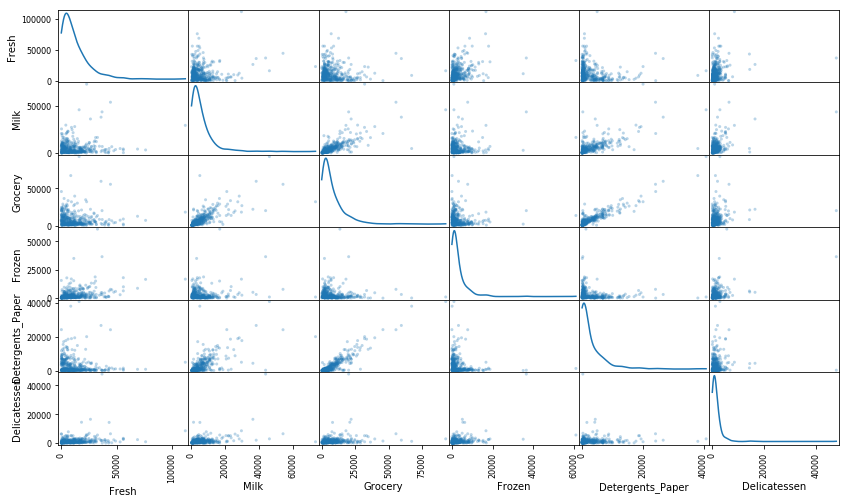

In [24]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 问题 3
这里是否存在一些特征他们彼此之间存在一定程度相关性？如果有请列出。这个结果是验证了还是否认了你尝试预测的那个特征的相关性？这些特征的数据是怎么分布的？

**提示：** 这些数据是正态分布（normally distributed）的吗？大多数的数据点分布在哪？

**回答:**
- 根据对角线的分布图，所有数据都是右偏斜分布，不是正态分布。
> 反馈：用统计学的术语来说，数据呈正偏态分布，
- 存在相关性，通过肉眼观察比如Grocery这列，和Milk、Detergents_Paper有相关性

## 数据预处理
在这个部分，你将通过在数据上做一个合适的缩放，并检测异常点（你可以选择性移除）将数据预处理成一个更好的代表客户的形式。预处理数据是保证你在分析中能够得到显著且有意义的结果的重要环节。

### 练习: 特征缩放
如果数据不是正态分布的，尤其是数据的平均数和中位数相差很大的时候（表示数据非常歪斜）。这时候通常用一个[非线性的缩放](https://github.com/czcbangkai/translations/blob/master/use_of_logarithms_in_economics/use_of_logarithms_in_economics.pdf)是很合适的，[（英文原文）](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) — 尤其是对于金融数据。一种实现这个缩放的方法是使用 [Box-Cox 变换](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，这个方法能够计算出能够最佳减小数据倾斜的指数变换方法。一个比较简单的并且在大多数情况下都适用的方法是使用自然对数。

在下面的代码单元中，你将需要实现以下功能：
 - 使用 `np.log` 函数在数据 `data` 上做一个对数缩放，然后将它的副本（不改变原始data的值）赋值给 `log_data`。 
 - 使用 `np.log` 函数在样本数据 `samples` 上做一个对数缩放，然后将它的副本赋值给 `log_samples`。

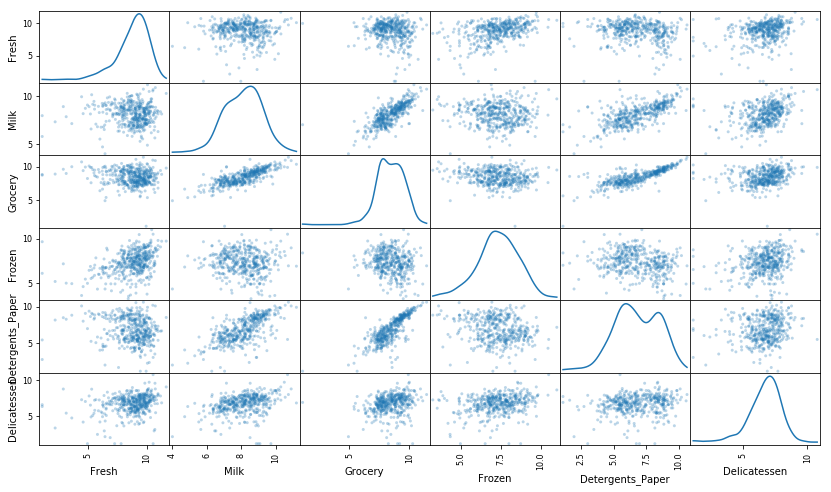

In [25]:
from scipy import stats

# TODO：使用自然对数缩放数据
log_data = np.log(data)

# TODO：使用自然对数缩放样本数据
## log_samples = np.log(X_train)
## 此处是要对3个点做sample
log_samples = np.log(samples)

# 为每一对新产生的特征制作一个散射矩阵
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# boxcox扩展
# https://www.jianshu.com/p/a0bac114705b
# https://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/

/Users/francis/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


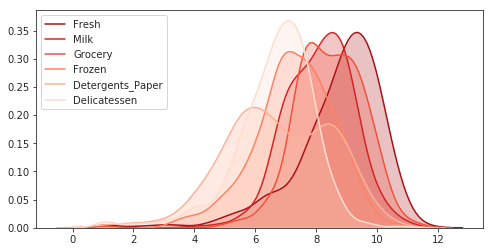

In [26]:
# 反馈增加
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds_r")
sns.set_style('ticks')
# plot densities of log-transformed data
plt.figure(figsize=(8,4))
for col in data.columns:
  sns.kdeplot(log_data[col], shade=True)
plt.legend(loc=2);

In [27]:
# 反馈增加
import seaborn as sns
g = sns.JointGrid("Dimension 1", "Dimension 2", reduced_data, xlim=(-6,6), ylim=(-5,5))
g = g.plot_joint(sns.kdeplot, cmap="Blues", shade=True)
g = g.plot_marginals(sns.kdeplot, shade=True)

NameError: name 'reduced_data' is not defined

In [28]:
## drop (开始理解错了sample以为是X_train)
## 其实要求的是自己选的sample
## fix
## 制作6个feature的sample
'''
Xf_train, Xf_test, yf_train, yf_test = train_test_split(data, new_data_y, test_size = 0.2, random_state = 0)
log_samples = np.log(Xf_train)
log_samples.shape
'''

'\nXf_train, Xf_test, yf_train, yf_test = train_test_split(data, new_data_y, test_size = 0.2, random_state = 0)\nlog_samples = np.log(Xf_train)\nlog_samples.shape\n'

### 观察
在使用了一个自然对数的缩放之后，数据的各个特征会显得更加的正态分布。对于任意的你以前发现有相关关系的特征对，观察他们的相关关系是否还是存在的（并且尝试观察，他们的相关关系相比原来是变强了还是变弱了）。

运行下面的代码以观察样本数据在进行了自然对数转换之后如何改变了。

In [29]:
# 展示经过对数变换后的样本数据
#display(log_samples)
log_samples.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


### 练习: 异常值检测
对于任何的分析，在数据预处理的过程中检测数据中的异常值都是非常重要的一步。异常值的出现会使得把这些值考虑进去后结果出现倾斜。这里有很多关于怎样定义什么是数据集中的异常值的经验法则。这里我们将使用[ Tukey 的定义异常值的方法](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：一个异常阶（outlier step）被定义成1.5倍的四分位距（interquartile range，IQR）。一个数据点如果某个特征包含在该特征的 IQR 之外的特征，那么该数据点被认定为异常点。

在下面的代码单元中，你需要完成下面的功能：
 - 将指定特征的 25th 分位点的值分配给 `Q1` 。使用 `np.percentile` 来完成这个功能。
 - 将指定特征的 75th 分位点的值分配给 `Q3` 。同样的，使用 `np.percentile` 来完成这个功能。
 - 将指定特征的异常阶的计算结果赋值给 `step`。
 - 选择性地通过将索引添加到 `outliers` 列表中，以移除异常值。

**注意：** 如果你选择移除异常值，请保证你选择的样本点不在这些移除的点当中！
一旦你完成了这些功能，数据集将存储在 `good_data` 中。

In [30]:
# outlier_index
outliers = []

# 对于每一个特征，找到值异常高或者是异常低的数据点
for feature in log_data.keys():
    
    # TODO: 计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: 计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: 使用四分位范围计算异常阶（1.5倍的四分位距）
    step = 1.5*(Q3-Q1)
    
    # 显示异常点
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outlier)
    print(feature_outlier.index.tolist())
    outliers = outliers + feature_outlier.index.tolist()
    
# TODO(可选): 选择你希望移除的数据点的索引
## outliers  = []
## 提到循环前处理

# IQR 计算的说明
## https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
## https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412]
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


[86, 98, 154, 356]
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


[75, 154]
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


[38, 57, 65, 145, 175, 264, 325, 420, 429, 439]
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


[75, 161]
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]


In [31]:
# updated v2 find who to delete
seen = {}
dupes = []

for x in outliers:
    if x not in seen:
        seen[x] = 1
    else:
        if seen[x] == 1:
            dupes.append(x)
        seen[x] += 1

dupes

# nice eg
## https://stackoverflow.com/questions/9835762/how-do-i-find-the-duplicates-in-a-list-and-create-another-list-with-them
## do not use count(too slow)

[154, 65, 75, 66, 128]

In [32]:
# 以下代码会移除outliers中索引的数据点, 并储存在good_data中
good_data = log_data.drop(log_data.index[dupes]).reset_index(drop = True)

In [33]:
## check if outliers droped
len(dupes) ==  log_data.shape[0] - good_data.shape[0]

True

In [34]:
good_data.shape[0]

435

### 问题 4
请列出所有在多于一个特征下被看作是异常的数据点。这些点应该被从数据集中移除吗？为什么？把你认为需要移除的数据点全部加入到到 `outliers` 变量中。

**回答:**
- 异常数据点42个，如上部分代码已经列出
- 通过drop处理后已经存为good_data，也做了drop数量的确认

## 特征转换
在这个部分中你将使用主成分分析（PCA）来分析批发商客户数据的内在结构。由于使用PCA在一个数据集上会计算出最大化方差的维度，我们将找出哪一个特征组合能够最好的描绘客户。

### 练习: 主成分分析（PCA）

既然数据被缩放到一个更加正态分布的范围中并且我们也移除了需要移除的异常点，我们现在就能够在 `good_data` 上使用PCA算法以发现数据的哪一个维度能够最大化特征的方差。除了找到这些维度，PCA 也将报告每一个维度的解释方差比（explained variance ratio）--这个数据有多少方差能够用这个单独的维度来解释。注意 PCA 的一个组成部分（维度）能够被看做这个空间中的一个新的“特征”，但是它是原来数据中的特征构成的。

在下面的代码单元中，你将要实现下面的功能：
 - 导入 `sklearn.decomposition.PCA` 并且将 `good_data` 用 PCA 并且使用6个维度进行拟合后的结果保存到 `pca` 中。
 - 使用 `pca.transform` 将 `log_samples` 进行转换，并将结果存储到 `pca_samples` 中。

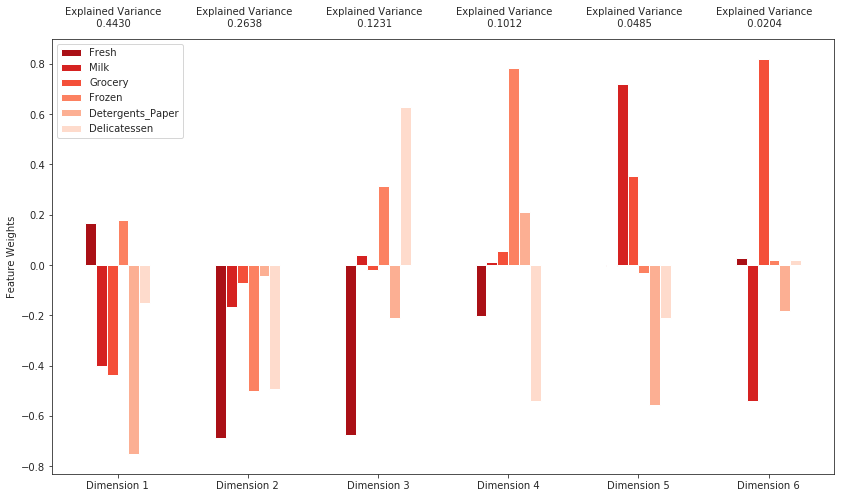

In [35]:
from sklearn.decomposition import PCA

# TODO：通过在good data上进行PCA，将其转换成6个维度
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO：使用上面的PCA拟合将变换施加在log_samples上
pca_samples = pca.transform(log_samples)
## 此处会报错，因为log_samples在前面去掉了一个feature
## 所以good和sample的shape不一样
## 先注释掉，后续使用时再调整

# 生成PCA的结果图
pca_results = vs.pca_results(good_data, pca)

In [36]:
pca.explained_variance_ratio_

array([0.44302505, 0.26379218, 0.1230638 , 0.10120908, 0.04850196,
       0.02040793])

In [37]:
sum(pca.explained_variance_ratio_[0:2])

0.7068172308068137

In [38]:
sum(pca.explained_variance_ratio_[0:4])

0.9310901099509614

In [39]:
good_data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

### 问题 5
数据的第一个和第二个主成分**总共**表示了多少的方差？ 前四个主成分呢？使用上面提供的可视化图像，从用户花费的角度来讨论前四个主要成分中每个主成分代表的消费行为并给出你做出判断的理由。

**提示：**
* 对每个主成分中的特征分析权重的正负和大小。
* 结合每个主成分权重的正负讨论消费行为。
* 某一特定维度上的正向增长对应正权特征的增长和负权特征的减少。增长和减少的速率和每个特征的权重相关。[参考资料：Interpretation of the Principal Components](https://onlinecourses.science.psu.edu/stat505/node/54)

**回答:**
- 计算见上面代码
- 2个feature，贡献了0.725
- 4个feature，贡献了0.977
    - demention1 - '-Fresh', '++Milk', '++Grocery', '-Frozen', '+++Detergents_Paper','-Delicatessen' 牛奶、杂物、清洁用品销量很大。符合咖啡店的特征。
    - demention2 - '++Fresh', '+Milk', '+Grocery', '++Frozen', '++Delicatessen' 鲜肉、冷冻食品、熟食销量比较大。符合肉食店的例子。
    - demention3 - '---Fresh', '+Milk', '+Frozen', '-Detergents_Paper','++Delicatessen' 不会出现生肉，熟食比较多。符合主食厨房那种专门店，不出现生肉是因为比较干净卫生，可以促进熟食的销售。
    - demention4 - '+Fresh', '+Milk', '---Frozen', '-Detergents_Paper','++Delicatessen' 和上面类似，不同种类的熟食专卖店，这次是不能有冷冻商品。

### 观察
运行下面的代码，查看经过对数转换的样本数据在进行一个6个维度的主成分分析（PCA）之后会如何改变。观察样本数据的前四个维度的数值。考虑这和你初始对样本点的解释是否一致。

In [40]:
# 展示经过PCA转换的sample log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,-0.9434,3.8210,-2.7013,2.8132,3.0338,0.4677
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


### 练习：降维
当使用主成分分析的时候，一个主要的目的是减少数据的维度，这实际上降低了问题的复杂度。当然降维也是需要一定代价的：更少的维度能够表示的数据中的总方差更少。因为这个，**累计解释方差比（cumulative explained variance ratio）**对于我们确定这个问题需要多少维度非常重要。另外，如果大部分的方差都能够通过两个或者是三个维度进行表示的话，降维之后的数据能够被可视化。

在下面的代码单元中，你将实现下面的功能：
 - 将 `good_data` 用两个维度的PCA进行拟合，并将结果存储到 `pca` 中去。
 - 使用 `pca.transform` 将 `good_data` 进行转换，并将结果存储在 `reduced_data` 中。
 - 使用 `pca.transform` 将 `log_samples` 进行转换，并将结果存储在 `pca_samples` 中。

In [41]:
# TODO：通过在good data上进行PCA，将其转换成两个维度
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO：使用上面训练的PCA将good data进行转换
reduced_data = pca.transform(good_data)

# 关于转换
# https://www.researchgate.net/post/How_important_is_transforming_the_data_before_PCA

# TODO：使用上面训练的PCA将log_samples进行转换
pca_samples = pca.transform(log_samples)

# 为降维后的数据创建一个DataFrame
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### 观察
运行以下代码观察当仅仅使用两个维度进行 PCA 转换后，这个对数样本数据将怎样变化。观察这里的结果与一个使用六个维度的 PCA 转换相比较时，前两维的数值是保持不变的。

In [42]:
# 展示经过两个维度的PCA转换之后的样本log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,-0.9434,3.8210
2,3.0206,4.8169


## 可视化一个双标图（Biplot）
双标图是一个散点图，每个数据点的位置由它所在主成分的分数确定。坐标系是主成分（这里是 `Dimension 1` 和 `Dimension 2`）。此外，双标图还展示出初始特征在主成分上的投影。一个双标图可以帮助我们理解降维后的数据，发现主成分和初始特征之间的关系。

运行下面的代码来创建一个降维后数据的双标图。

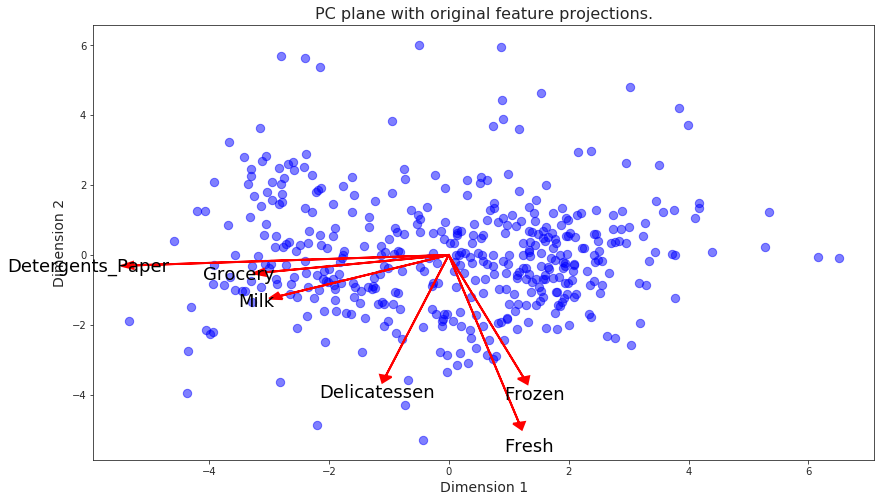

In [43]:
# 可视化双标图
vs.biplot(good_data, reduced_data, pca);

### 观察

一旦我们有了原始特征的投影（红色箭头），就能更加容易的理解散点图每个数据点的相对位置。

在这个双标图中，哪些初始特征与第一个主成分有强关联？哪些初始特征与第二个主成分相关联？你观察到的是否与之前得到的 pca_results 图相符？

## 聚类

在这个部分，你讲选择使用 K-Means 聚类算法或者是高斯混合模型聚类算法以发现数据中隐藏的客户分类。然后，你将从簇中恢复一些特定的关键数据点，通过将它们转换回原始的维度和规模，从而理解他们的含义。

### 问题 6
使用 K-Means 聚类算法的优点是什么？使用高斯混合模型聚类算法的优点是什么？基于你现在对客户数据的观察结果，你选用了这两个算法中的哪一个，为什么？

**回答:**

选择K-means算法，因为项目的目标可以是以后扩展商用，需要考虑到计算复杂度，如果结果无法达到要求再使用GMM实现尝试。

### // K-means算法流程

给定条件：example set: $x_1,x_2,…,x_n$

初始化：K个簇类的中心点坐标(用C来表示): $μ_1,μ_2,…,μ_k$ 

K-均值聚类步骤：
1. 计算每个样本到每个簇类中心点的距离 $d_ij=∥x_i−μ_j∥^{2}_{2}$
2. 找出距离每个样本最近的集群，将该样本标为该类
3. 更新每个簇类的中心点坐标，当中心点不再发生变动即结束迭代过程

算法特点：
算法简单，容易理解。计算量不大，收敛快。可以很方便的进行分布式计算。默认所有属性对距离的影响是相同的，默认所有数据均匀分布在聚类中。如果数据是三维空间中的圆柱体，模型就失效了。

### // GMM算法流程

高斯混合聚类采用概率模型来表达聚类原型。换句话说，GMM聚类方法最终得到的是样本属于每个类别的概率，而不是像K均值那样将它直接归化为某一类别，因此也称为软聚类。

初始化：高斯混合分布的模型参数 ${\{(α_i,μ_i,Σ_i)|1≤i≤k}\}$。$α_i$ 代表各个混合成分的系数(mixture coefficient) $α_i$ 满足性质 $α_i>0,Σ^k_iα_i=1$，$μ_i$ 代表各个混合成分的n维均值向量，$Σ_i$ 代表n×n协方差矩阵。  

高斯混合聚类步骤：(详细公式见参考链接）
- 假设各个混合成分的系数 $α_i$ 已知，计算 $x_j$ 由各混合成分生成的后验概率 $γ_ji$
- 对于每个混合成分 $i=1,2,…,ki=1,2,…,k$ 做更新
- 将模型参数 ${\{(α_i,μ_i,Σ_i)|1≤i≤k}\}$ 更新为${\{(α^′_i,μ^′_i,Σ^′_i)|1≤i≤k}\}$

算法特点：
不容易理解，需要翻翻统计学的教材。假设各个特征的权重不同，假设各个聚类中的数据分布不均匀。理论上可以拟合任何连续函数。计算量较大。如果其中一个聚类的数据并不服从正态分布、偏态分布，聚类算法会出现偏差。

### // 参考链接

- [/参考链接1/](https://www.cnblogs.com/siberiawind/p/9523131.html)
- [/参考链接2/](https://segmentfault.com/a/1190000009294693)
- [/参考链接3/](https://zhuanlan.zhihu.com/p/30211119)


### 练习: 创建聚类

针对不同情况，有些问题你需要的聚类数目可能是已知的。但是在聚类数目不作为一个**先验**知道的情况下，我们并不能够保证某个聚类的数目对这个数据是最优的，因为我们对于数据的结构（如果存在的话）是不清楚的。但是，我们可以通过计算每一个簇中点的**轮廓系数**来衡量聚类的质量。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)衡量了它与分配给他的簇的相似度，这个值范围在-1（不相似）到1（相似）。**平均**轮廓系数为我们提供了一种简单地度量聚类质量的方法。

在接下来的代码单元中，你将实现下列功能：
 - 在 `reduced_data` 上使用一个聚类算法，并将结果赋值到 `clusterer`，需要设置  `random_state` 使得结果可以复现。
 - 使用 `clusterer.predict` 预测 `reduced_data` 中的每一个点的簇，并将结果赋值到 `preds`。
 - 使用算法的某个属性值找到聚类中心，并将它们赋值到 `centers`。
 - 预测 `pca_samples` 中的每一个样本点的类别并将结果赋值到 `sample_preds`。
 - 导入 `sklearn.metrics.silhouette_score` 包并计算 `reduced_data` 相对于 `preds` 的轮廓系数。
   - 将轮廓系数赋值给 `score` 并输出结果。
   
> 反馈：
同时，你会发现，随着聚类数的增大，轮廓分数又会递增乃至达到一个局部极大值？这并不是一个好现象，因为当我们选择轮廓分数作为我们的评测基准时，我们希望这是一个凸函数（即只有一个峰），这样我们可以很顺利地对这个函数最优化。但是这个函数出现了多个峰，也就是除了2个聚类时对应的最大值以外，还有其他聚类情况对应的极大值。你可以搜一搜相关的信息，自己探索一下相关的问题，并可以写在回答中~ 你可以参考[这个页面](http://blog.csdn.net/xueyingxue001/article/details/51966932)。


思考：链接中的最后一句：所有样本的s i 的均值称为聚类结果的轮廓系数，是该聚类是否合理、有效的度量。
说明了在k越来越多的时候，分类的中心太多，会造成无论那个点的簇内相似度和簇间相似度组成的s(i)都会很差（而且也不会太差到哪里了，因为已经近乎随机了）。

判定：感觉这种情况，只要根据k在依次增加的情况下，满足连续减小变化（比如说3次）就可以判定前面的最好。或者当在一点抖动几次，也可以判定无法再优化了。

凸函数：run了一次200的，感觉最后就是在一个点波动，而开始的函数2时最大，貌似还是凸函数，但是随着k的增大在波动。

In [44]:
# n=2 - n=20 测试
# 因为后面可视化要求n=2，这里提前
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2,201):
    clusterer = KMeans(n_clusters=i, random_state=0).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples)
    score = silhouette_score(reduced_data,preds)
    print(i, 'center score:', score)

2 center score: 0.42628101546910835
3 center score: 0.39689092644980506
4 center score: 0.3320095826820278
5 center score: 0.3509907789312651
6 center score: 0.3666089873432108
7 center score: 0.363315403844963
8 center score: 0.35099406993457966
9 center score: 0.3541410898467623
10 center score: 0.3510037480942147
11 center score: 0.35193038325547465
12 center score: 0.3508854952847517
13 center score: 0.35963441956055836
14 center score: 0.3611341148230508
15 center score: 0.36590315818643676
16 center score: 0.3470954582582189
17 center score: 0.36515335009506616
18 center score: 0.36256537726811444
19 center score: 0.33258938866883275
20 center score: 0.35016718046855
21 center score: 0.34841563180874685
22 center score: 0.3482234593225129
23 center score: 0.33891198098678116
24 center score: 0.3416542493371479
25 center score: 0.34368743189038364
26 center score: 0.3457816004669255
27 center score: 0.344030994857662
28 center score: 0.3564718938296029
29 center score: 0.345027900

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO：在降维后的数据上使用你选择的聚类算法
clusterer = KMeans(n_clusters=2, random_state=0).fit(reduced_data)
#clusterer.fit(reduced_data)
## 官方文档发现可以直接用.fit完成适配

# TODO：预测每一个点的簇
preds = clusterer.predict(reduced_data)

# TODO：找到聚类中心
centers = clusterer.cluster_centers_

# TODO：预测在每一个转换后的样本点的类
sample_preds = clusterer.predict(pca_samples)

# TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
score = silhouette_score(reduced_data,preds)

score

0.42628101546910835

### 问题 7

汇报你尝试的不同的聚类数对应的轮廓系数。在这些当中哪一个聚类的数目能够得到最佳的轮廓系数？

**回答:**
- 根据上上段代码，可以看出n=2时效果最好，轮廓系数得分为0.426
- 还有一点发现随着n的增加，轮廓系数会类似随机的在0.35左右波动
- 检查了下官方文档，说明由于n比较多，点与临近的类已经比较近了：

> Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

[/sihouette analysis/](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

### 聚类可视化
一旦你选好了通过上面的评价函数得到的算法的最佳聚类数目，你就能够通过使用下面的代码块可视化来得到的结果。作为实验，你可以试着调整你的聚类算法的聚类的数量来看一下不同的可视化结果。但是你提供的最终的可视化图像必须和你选择的最优聚类数目一致。

In [46]:
reduced_data.shape

(435, 2)

In [47]:
pca_samples.shape

(3, 2)

In [48]:
preds.shape

(435,)

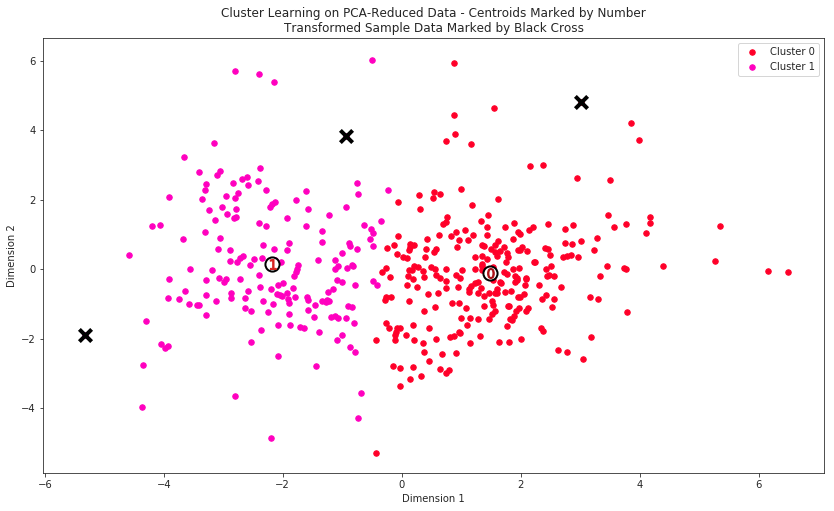

In [49]:
# 从已有的实现中展示聚类的结果
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 练习: 数据恢复
上面的可视化图像中提供的每一个聚类都有一个中心点。这些中心（或者叫平均点）并不是数据中真实存在的点，但是是所有预测在这个簇中的数据点的平均。对于创建客户分类的问题，一个簇的中心对应于那个分类的平均用户。因为这个数据现在进行了降维并缩放到一定的范围，我们可以通过施加一个反向的转换恢复这个点所代表的用户的花费。

在下面的代码单元中，你将实现下列的功能：
 - 使用 `pca.inverse_transform` 将 `centers` 反向转换，并将结果存储在 `log_centers` 中。
 - 使用 `np.log` 的反函数 `np.exp` 反向转换 `log_centers` 并将结果存储到 `true_centers` 中。


In [50]:
# TODO：反向转换中心点
log_centers = pca.inverse_transform(centers)

# TODO：对中心点做指数转换
true_centers = np.exp(log_centers)

# 显示真实的中心点
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### 问题 8
考虑上面的代表性数据点在每一个产品类型的花费总数，你认为这些客户分类代表了哪类客户？为什么？需要参考在项目最开始得到的统计值来给出理由。

**提示：** 一个被分到`'Cluster X'`的客户最好被用 `'Segment X'`中的特征集来标识的企业类型表示。

**回答:**
 - segment0：
     - 肉多、冷冻食品多；杂物、熟食较小；清洁用品很少。
     - 比较像麦当劳这样的快餐行业。
 - segment1：
     - 普遍都多；杂物、牛奶、清洁用品非常多。
     - 比较像超市。
     
 **updated v2**
 
 ---
 
 - 根据后面代码，最后 seg0、seg1 和中位数的比较结果：
     - 完全区分开了，两个比较结果的 True 、 False 完全是相反的
     - 说明两个中心区分的比较理想
     - seg0 是肉和冷冻食品多，看着像卖各种烤肠热加工和冰激凌的专门店（电影里常见的热狗推车？）
     - seg1 其他所有项都多，感觉像小型超市或者咖啡店这样的需要奶、熟食（是不是蛋糕这样的也算）的店。

In [51]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [52]:
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


In [53]:
half = data.describe().loc['50%']
half

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
Name: 50%, dtype: float64

In [54]:
seg0 = true_centers.loc['Segment 0']
seg1 = true_centers.loc['Segment 1']
seg0, seg1

(Fresh               8867.0
 Milk                1897.0
 Grocery             2477.0
 Frozen              2088.0
 Detergents_Paper     294.0
 Delicatessen         681.0
 Name: Segment 0, dtype: float64, Fresh                4005.0
 Milk                 7900.0
 Grocery             12104.0
 Frozen                952.0
 Detergents_Paper     4561.0
 Delicatessen         1036.0
 Name: Segment 1, dtype: float64)

In [55]:
seg0 > half

Fresh                True
Milk                False
Grocery             False
Frozen               True
Detergents_Paper    False
Delicatessen        False
dtype: bool

In [56]:
seg1 > half

Fresh               False
Milk                 True
Grocery              True
Frozen              False
Detergents_Paper     True
Delicatessen         True
dtype: bool

           Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0   52.3  30.5     30.5    58.7              28.3          37.6
Segment 1   28.7  79.0     79.9    35.1              79.2          52.9


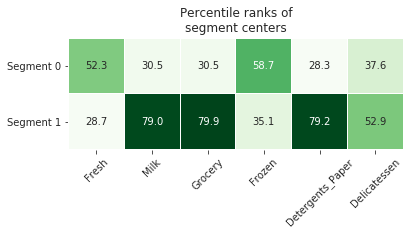

In [57]:
# 反馈 - 使用热力图展示
# 特别好的一个应用例子
import seaborn as sns
import matplotlib.pyplot as plt
# add the true centers as rows to our original data
newdata = data.append(true_centers)

# show the percentiles of the centers
ctr_pcts = 100. * newdata.rank(axis=0, pct=True).loc[['Segment 0', 'Segment 1']].round(decimals=3)
print(ctr_pcts)

# visualize percentiles with heatmap
sns.heatmap(ctr_pcts, annot=True, cmap='Greens', fmt='.1f', linewidth=.1, square=True, cbar=False)
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0)
plt.title('Percentile ranks of\nsegment centers');

### 问题 9
对于每一个样本点**问题 8 **中的哪一个分类能够最好的表示它？你之前对样本的预测和现在的结果相符吗？

运行下面的代码单元以找到每一个样本点被预测到哪一个簇中去。

In [58]:
# 显示预测结果
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**回答:**
- 1 supermarket
    - 相符
- 2 coffee shop
    - 不相符
    - 反思：虽然比例不同，但各种销量都比较大了
- 3 grocery
    - 相符
    - 专门领域的店铺
- 反思：
    - 最开始选择的时候太粗糙，只考虑比例没考虑量级
    - 可以先剔除异常值再进行筛选可能会更好些

## 结论

在最后一部分中，你要学习如何使用已经被分类的数据。首先，你要考虑不同组的客户**客户分类**，针对不同的派送策略受到的影响会有什么不同。其次，你要考虑到，每一个客户都被打上了标签（客户属于哪一个分类）可以给客户数据提供一个多一个特征。最后，你会把客户分类与一个数据中的隐藏变量做比较，看一下这个分类是否辨识了特定的关系。

### 问题 10
在对他们的服务或者是产品做细微的改变的时候，公司经常会使用 [A/B tests ](https://en.wikipedia.org/wiki/A/B_testing)以确定这些改变会对客户产生积极作用还是消极作用。这个批发商希望考虑将他的派送服务从每周5天变为每周3天，但是他只会对他客户当中对此有积极反馈的客户采用。这个批发商应该如何利用客户分类来知道哪些客户对它的这个派送策略的改变有积极的反馈，如果有的话？你需要给出在这个情形下A/B 测试具体的实现方法，以及最终得出结论的依据是什么？

**提示：** 我们能假设这个改变对所有的客户影响都一致吗？我们怎样才能够确定它对于哪个类型的客户影响最大？

**回答：**

 - segment0：
     - 肉多、冷冻食品多；杂物、熟食较小；清洁用品很少。
     - 比较像麦当劳这样的快餐行业。
 - segment1：
     - 普遍都多；杂物、牛奶、清洁用品非常多。
     - 比较像超市。
     
按照以下4个部分进行：

- 定义目标
    - 定义AB测试目标：特定顾客每周5天配送服务改为3天，是否会影响客户满意度。
    - 分析：可以将送货成本降低，但是会影响食品新鲜程度。
- 设定假设检验及a
    - 根据前面2个分类分析
        - segment0代表快餐行业：
            - 正：个人经验来讲，在我吃金拱门的时候，只要食物不是变质的，原材料是今天送的还是昨天送的问题不大。
            - 反：但是可能涉及到仓储的存储能力，需要设计好3/7的送货时间，避免需要增加额外仓储给顾客带来的成本。
        - segment1代表超市：
            - 反：很多果蔬奶品等客户还是比较关注生产日期的。
    - 假设检验：
        - 根据目标，第1步的假设检验可以设置为（只考虑seg0的变化，因为seg1本来就不打算变化。如果seg0测试具有统计显著性，再迭代考虑是否对seg1进行测试）：
        - $H_0: P_{satisfy-seg0-new} <= P_{satisfy-seg0_old}$
        - $H_1: P_{satisfy-seg0-new} > P_{satisfy-seg0_old}$
    - $\alpha$ < 0.05 (采用一般值）
- 设定A/B测试所需数据及收集过程
    - 设定用户满意度度量方式（纸质或者电子）
    - 设定收集过程
    - 确保收集的数据可以得出分析结论
- 执行测试并分析结果
    - 执行测试
    - 分析数据
    - 形成报告

### 问题 11
通过聚类技术，我们能够将原有的没有标记的数据集中的附加结构分析出来。因为每一个客户都有一个最佳的划分（取决于你选择使用的聚类算法），我们可以把用户分类作为数据的一个[工程特征](https://en.wikipedia.org/wiki/Feature_learning#Unsupervised_feature_learning)。假设批发商最近迎来十位新顾客，并且他已经为每位顾客每个产品类别年度采购额进行了预估。进行了这些估算之后，批发商该如何运用它的预估和非监督学习的结果来对这十个新的客户进行更好的预测？

**提示**：在下面的代码单元中，我们提供了一个已经做好聚类的数据（聚类结果为数据中的cluster属性），我们将在这个数据集上做一个小实验。尝试运行下面的代码看看我们尝试预测‘Region’的时候，如果存在聚类特征'cluster'与不存在相比对最终的得分会有什么影响？这对你有什么启发？

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 读取包含聚类结果的数据
cluster_data = pd.read_csv("cluster.csv")
y = cluster_data['Region']
X = cluster_data.drop(['Region'], axis = 1)

# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

clf = RandomForestClassifier(n_estimators=10, random_state=24)
clf.fit(X_train, y_train)
score_with_cluster = clf.score(X_test, y_test)

# 移除cluster特征
X_train = X_train.copy()
X_train.drop(['cluster'], axis=1, inplace=True)
X_test = X_test.copy()
X_test.drop(['cluster'], axis=1, inplace=True)
clf.fit(X_train, y_train)
score_no_cluster = clf.score(X_test, y_test)

print("不使用cluster特征的得分: %.6f"%score_no_cluster)
print("使用cluster特征的得分: %.6f"%score_with_cluster)

## 设置了n_estimator消除了future warning
## 当设为100时结果为：
## 0.724138 vs 0.724138

不使用cluster特征的得分: 0.643678
使用cluster特征的得分: 0.666667


**回答：**
- 影响的是计算的效率（和精度无关）！
    - 在n=10的时候，结果为：0.643678 vs 0.666667
    - 因为有future warning，修改了下代码，试了下n=100
    - 居然可以达到一样的答案：0.724138
    - 说明分类数据能让随机森林更快的收敛
    
> 反馈：
实际上，聚类数据会使结果略微提升。尽管在这个题目里的提升并不大，但这一现象可以给我们如下的思考：

  * 我们知道，监督学习和非监督学习解决的是两类工作。对于监督学习，它是通过(feature,label)的对来学习，最后预测label；对于非监督学习，它只通过feature本身来学习，最后能预测对应sample的label。
  * 那么，在这个情景中，我们可以使用非监督学习的成果，即得到的label，来增强监督学习的结果：利用这个label加入监督学习的input feature，来给监督学习增维。


**question2**：请问老师这个理解对么？:
```python
X_train = X_train.copy()
```
这行是什么意思？我理解这里代码偷懒了，因为不加这一行会报 ` SettingWithCopyWarning ` 但是这里根本还是爱X_train上做的修改，所以没有用的，应该是这样：

```python
X_train_copy = X_train.copy()
X_train_copy.drop(['cluster'], axis=1, inplace=True)
```
> 反馈：
这个理解是对的

### 可视化内在的分布

在这个项目的开始，我们讨论了从数据集中移除 `'Channel'` 和 `'Region'` 特征，这样在分析过程中我们就会着重分析用户产品类别。通过重新引入 `Channel` 这个特征到数据集中，并施加和原来数据集同样的 PCA 变换的时候我们将能够发现数据集产生一个有趣的结构。

运行下面的代码单元以查看哪一个数据点在降维的空间中被标记为 `'HoReCa'` (旅馆/餐馆/咖啡厅)或者 `'Retail'`。另外，你将发现样本点在图中被圈了出来，用以显示他们的标签。

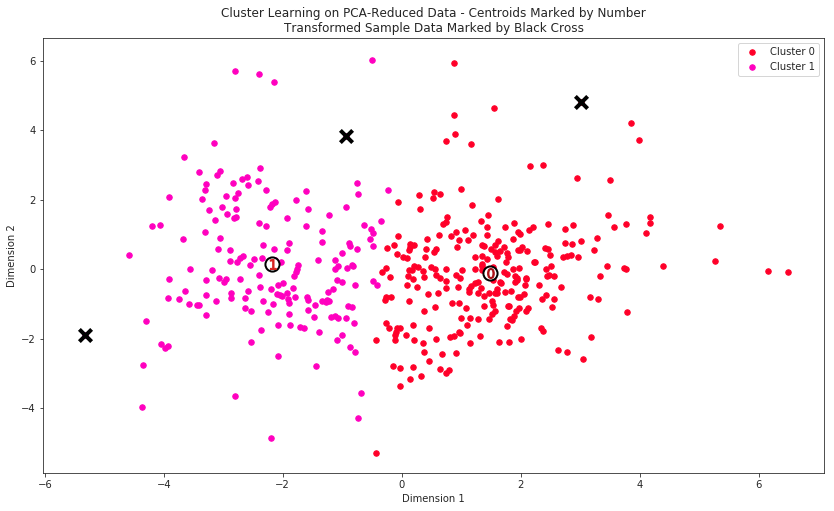

In [60]:
vs.cluster_results(reduced_data, preds, centers, pca_samples)

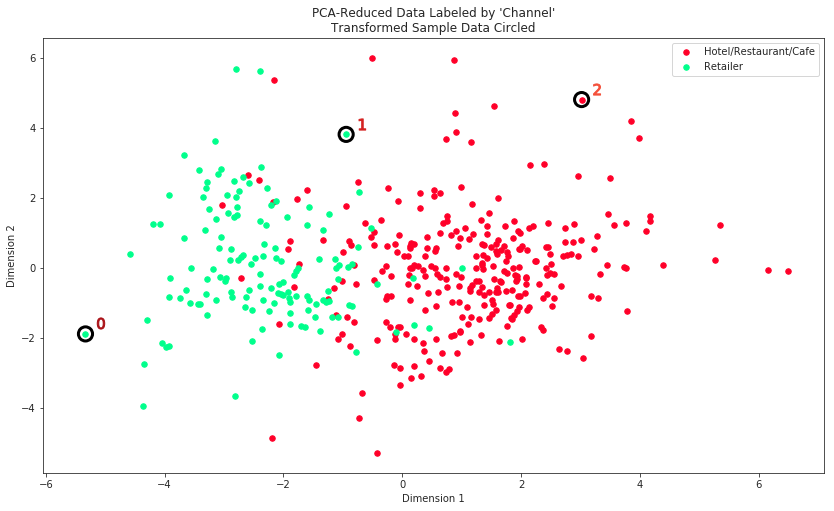

In [61]:
# 根据‘Channel‘数据显示聚类的结果
vs.channel_results(reduced_data, dupes, pca_samples)

### 问题 12

你选择的聚类算法和聚类点的数目，与内在的旅馆/餐馆/咖啡店和零售商的分布相比，有足够好吗？根据这个分布有没有哪个簇能够刚好划分成'零售商'或者是'旅馆/饭店/咖啡馆'？你觉得这个分类和前面你对于用户分类的定义是一致的吗？

**回答：**

- 不好，两个点为outlier值，只有一个点正确。
- 这说明了先去掉outlier值的重要性。
- 如果不去掉，用肉眼观察，分类还是很准确的。

> **注意**: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。  